In [1]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf
import pandas_ta as ta
import os

import pandas_datareader as pdr
from darts import TimeSeries
from darts.models import ExponentialSmoothing, AutoARIMA, Prophet

import warnings
warnings.filterwarnings('ignore')

C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
doge_ticker = yf.Ticker("DOGE-USD")

In [3]:
if os.path.exists('doge.csv'):
    doge_data = pd.read_csv('doge.csv', index_col=0)
else:
    doge_data = doge_ticker.history(period='max')
    doge_data.to_csv('doge.csv')

In [4]:
doge_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-11-09 00:00:00+00:00,0.001207,0.001415,0.001181,0.001415,6259550,0.0,0.0
2017-11-10 00:00:00+00:00,0.001421,0.001431,0.001125,0.001163,4246520,0.0,0.0
2017-11-11 00:00:00+00:00,0.001146,0.001257,0.001141,0.001201,2231080,0.0,0.0
2017-11-12 00:00:00+00:00,0.001189,0.001210,0.001002,0.001038,3288960,0.0,0.0
2017-11-13 00:00:00+00:00,0.001046,0.001212,0.001019,0.001211,2481270,0.0,0.0
...,...,...,...,...,...,...,...
2024-11-22 00:00:00+00:00,0.387626,0.419192,0.381520,0.412924,13591947495,0.0,0.0
2024-11-23 00:00:00+00:00,0.412924,0.477460,0.405566,0.430012,20873625275,0.0,0.0
2024-11-24 00:00:00+00:00,0.430012,0.452428,0.400967,0.429882,12213185937,0.0,0.0


In [5]:
doge_data.index = pd.to_datetime(doge_data.index)

In [6]:
doge_data.drop(['Dividends', 'Stock Splits'], axis=1)

,Open,High,Low,Close,Volume
Date,,,,,
2017-11-09 00:00:00+00:00,0.001207,0.001415,0.001181,0.001415,6259550
2017-11-10 00:00:00+00:00,0.001421,0.001431,0.001125,0.001163,4246520
2017-11-11 00:00:00+00:00,0.001146,0.001257,0.001141,0.001201,2231080
2017-11-12 00:00:00+00:00,0.001189,0.001210,0.001002,0.001038,3288960
2017-11-13 00:00:00+00:00,0.001046,0.001212,0.001019,0.001211,2481270
...,...,...,...,...,...
2024-11-22 00:00:00+00:00,0.387626,0.419192,0.381520,0.412924,13591947495
2024-11-23 00:00:00+00:00,0.412924,0.477460,0.405566,0.430012,20873625275
2024-11-24 00:00:00+00:00,0.430012,0.452428,0.400967,0.429882,12213185937


In [7]:
doge_data.index = doge_data.index.date
doge_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
2017-11-09,0.001207,0.001415,0.001181,0.001415,6259550,0.0,0.0
2017-11-10,0.001421,0.001431,0.001125,0.001163,4246520,0.0,0.0
2017-11-11,0.001146,0.001257,0.001141,0.001201,2231080,0.0,0.0
2017-11-12,0.001189,0.001210,0.001002,0.001038,3288960,0.0,0.0
2017-11-13,0.001046,0.001212,0.001019,0.001211,2481270,0.0,0.0
...,...,...,...,...,...,...,...
2024-11-22,0.387626,0.419192,0.381520,0.412924,13591947495,0.0,0.0
2024-11-23,0.412924,0.477460,0.405566,0.430012,20873625275,0.0,0.0
2024-11-24,0.430012,0.452428,0.400967,0.429882,12213185937,0.0,0.0
2024-11-25,0.429895,0.437042,0.381515,0.393340,9773285006,0.0,0.0


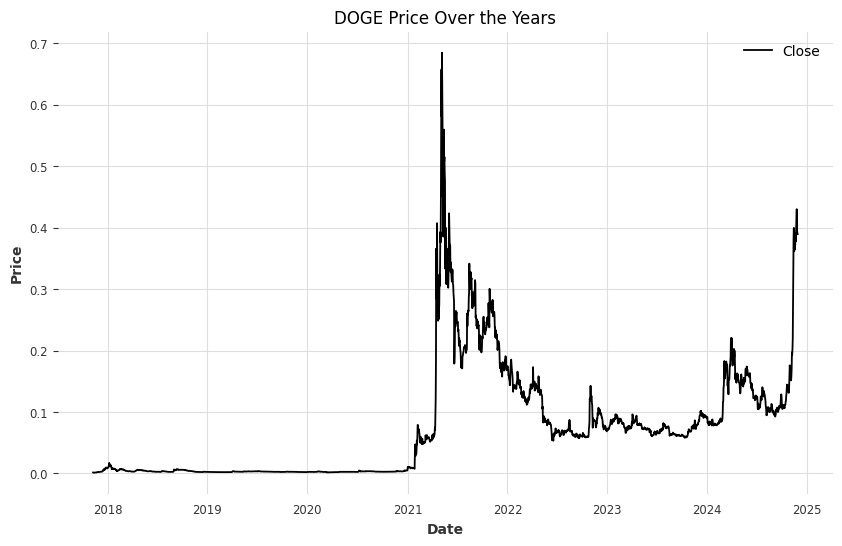

In [8]:
doge_data.plot.line(y='Close', figsize=(10,6), use_index=True)
plt.title('DOGE Price Over the Years')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [9]:
date_to_check = '2023-11-01'

doge_data.index = pd.to_datetime(doge_data.index)

if date_to_check in doge_data.index:
    print(f"Date for {date_to_check} exists.")
    print(doge_data.loc[date_to_check])
else:
    print(f"Date for {date_to_check} does not exist.")

Date for 2023-11-01 exists.
Open            6.827900e-02
High            6.955400e-02
Low             6.612900e-02
Close           6.884100e-02
Volume          4.615390e+08
Dividends       0.000000e+00
Stock Splits    0.000000e+00
Name: 2023-11-01 00:00:00, dtype: float64


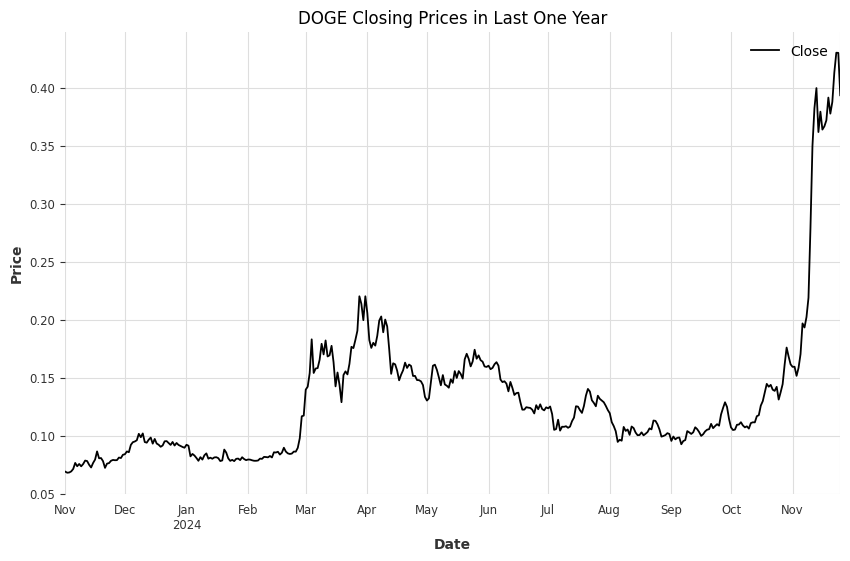

In [17]:
doge_one_year = doge_data.loc['2023-11-01':'2024-11-26']
doge_one_year.plot.line(y='Close', figsize=(10,6), use_index=True)
plt.title('DOGE Closing Prices in Last One Year')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [ ]:
# Loading wiki df 
wiki = pd.read_csv('D:\Python_Files\Crypto\doge_wikipedia_edits.csv', index_col = 0, parse_dates=True)
wiki

,edit_count,sentiment,neg_sentiment
2014-01-12,8.766667,-0.113297,0.424761
2014-01-13,5.133333,-0.161805,0.452034
2014-01-14,3.666667,-0.145299,0.443287
2014-01-15,3.133333,-0.146360,0.428704
2014-01-16,3.133333,-0.146335,0.428704
...,...,...,...
2024-11-21,0.166667,0.013405,0.050000
2024-11-22,0.166667,0.013405,0.050000
2024-11-23,0.166667,0.013405,0.050000
2024-11-24,0.166667,0.013405,0.050000


In [19]:
wiki.columns = [col.title() for col in wiki.columns]
wiki.columns

Index(['Edit_Count', 'Sentiment', 'Neg_Sentiment'], dtype='object')

In [20]:
doge_wiki_data = doge_data.merge(wiki, left_index=True, right_index=True)
doge_wiki_data 

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Edit_Count,Sentiment,Neg_Sentiment
2017-11-09,0.001207,0.001415,0.001181,0.001415,6259550,0.0,0.0,0.466667,-0.165739,0.190476
2017-11-10,0.001421,0.001431,0.001125,0.001163,4246520,0.0,0.0,0.500000,-0.140801,0.190476
2017-11-11,0.001146,0.001257,0.001141,0.001201,2231080,0.0,0.0,0.466667,-0.107504,0.157143
2017-11-12,0.001189,0.001210,0.001002,0.001038,3288960,0.0,0.0,0.533333,-0.131345,0.190476
2017-11-13,0.001046,0.001212,0.001019,0.001211,2481270,0.0,0.0,0.533333,-0.131345,0.190476
...,...,...,...,...,...,...,...,...,...,...
2024-11-21,0.377497,0.394944,0.370012,0.387617,8052510566,0.0,0.0,0.166667,0.013405,0.050000
2024-11-22,0.387626,0.419192,0.381520,0.412924,13591947495,0.0,0.0,0.166667,0.013405,0.050000
2024-11-23,0.412924,0.477460,0.405566,0.430012,20873625275,0.0,0.0,0.166667,0.013405,0.050000
2024-11-24,0.430012,0.452428,0.400967,0.429882,12213185937,0.0,0.0,0.166667,0.013405,0.050000


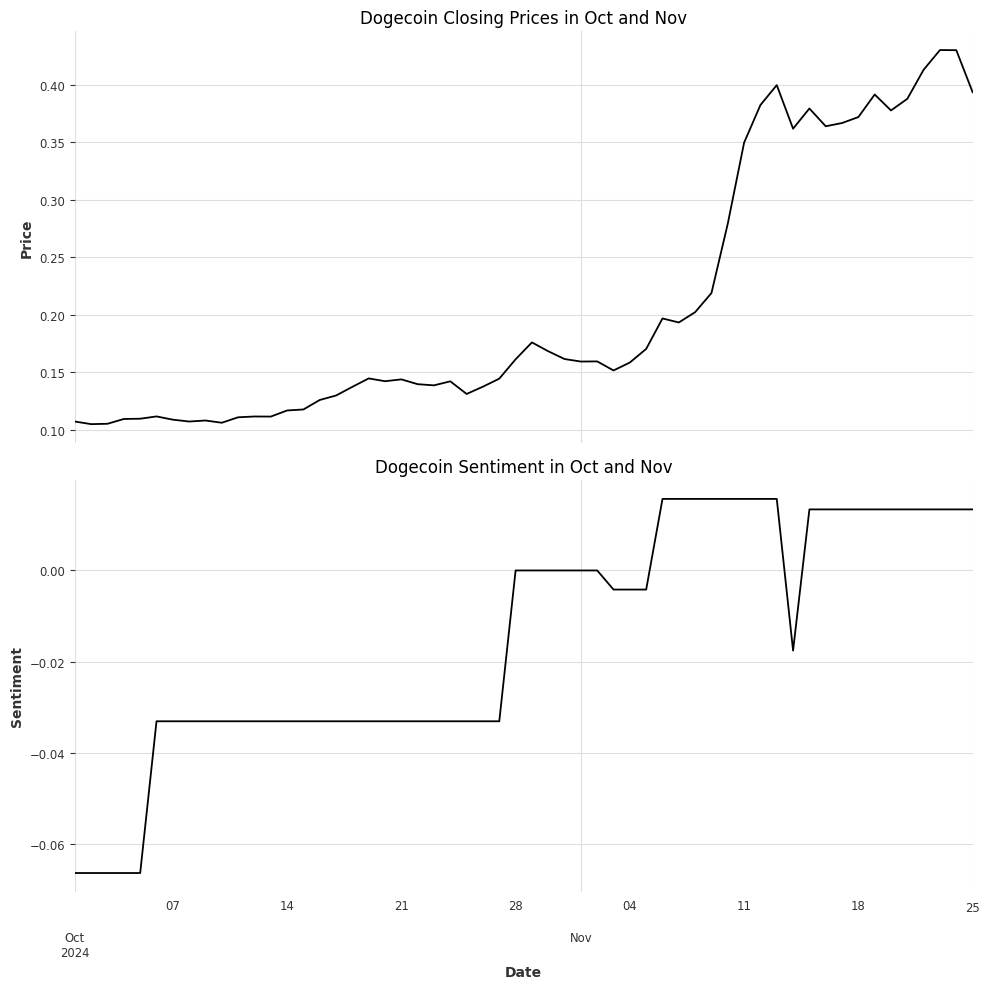

In [21]:
doge_subset = doge_wiki_data.loc['2024-10-01':'2024-11-26']

# Define the figure and subplots
fig, axes = plt.subplots(2,1, figsize=(10, 10), sharex=True)

# First subplot: Doge Closing Prices
doge_subset['Close'].plot(
    ax=axes[0],
    title='Dogecoin Closing Prices in Oct and Nov',
    ylabel='Price'
)

# Second subplot: Bitcoin Sentiment
doge_subset['Sentiment'].plot(
    ax=axes[1],
    title='Dogecoin Sentiment in Oct and Nov',
    ylabel='Sentiment'
)

# Add a shared x-axis label
axes[1].set_xlabel('Date')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [22]:
ethereum_ticker = yf.Ticker('ETH-USD')

In [26]:
if os.path.exists('ethereum.csv'):
    ethereum_data = pd.read_csv('ethereum.csv', index_col = 0)
else:
    ethereum_data = ethereum_ticker.history(period='max')
    ethereum_data.to_csv('ethereum.csv')

In [27]:
ethereum_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-11-09 00:00:00+00:00,308.644989,329.451996,307.056000,320.884003,893249984,0.0,0.0
2017-11-10 00:00:00+00:00,320.670990,324.717987,294.541992,299.252991,885985984,0.0,0.0
2017-11-11 00:00:00+00:00,298.585999,319.453003,298.191986,314.681000,842300992,0.0,0.0
2017-11-12 00:00:00+00:00,314.690002,319.153015,298.513000,307.907990,1613479936,0.0,0.0
2017-11-13 00:00:00+00:00,307.024994,328.415009,307.024994,316.716003,1041889984,0.0,0.0
...,...,...,...,...,...,...,...
2024-11-22 00:00:00+00:00,3360.654297,3428.460449,3262.808838,3331.600830,36775716442,0.0,0.0
2024-11-23 00:00:00+00:00,3331.645508,3499.370850,3317.654785,3396.223389,38835184688,0.0,0.0
2024-11-24 00:00:00+00:00,3396.999512,3451.802246,3288.430908,3363.659912,27901454185,0.0,0.0


In [32]:
ethereum_data.index = pd.to_datetime(ethereum_data.index)

In [33]:
ethereum_data.index = ethereum_data.index.date
ethereum_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
2017-11-09,308.644989,329.451996,307.056000,320.884003,893249984,0.0,0.0
2017-11-10,320.670990,324.717987,294.541992,299.252991,885985984,0.0,0.0
2017-11-11,298.585999,319.453003,298.191986,314.681000,842300992,0.0,0.0
2017-11-12,314.690002,319.153015,298.513000,307.907990,1613479936,0.0,0.0
2017-11-13,307.024994,328.415009,307.024994,316.716003,1041889984,0.0,0.0
...,...,...,...,...,...,...,...
2024-11-22,3360.654297,3428.460449,3262.808838,3331.600830,36775716442,0.0,0.0
2024-11-23,3331.645508,3499.370850,3317.654785,3396.223389,38835184688,0.0,0.0
2024-11-24,3396.999512,3451.802246,3288.430908,3363.659912,27901454185,0.0,0.0
2024-11-25,3364.601562,3545.278809,3304.093994,3413.543945,51544793988,0.0,0.0


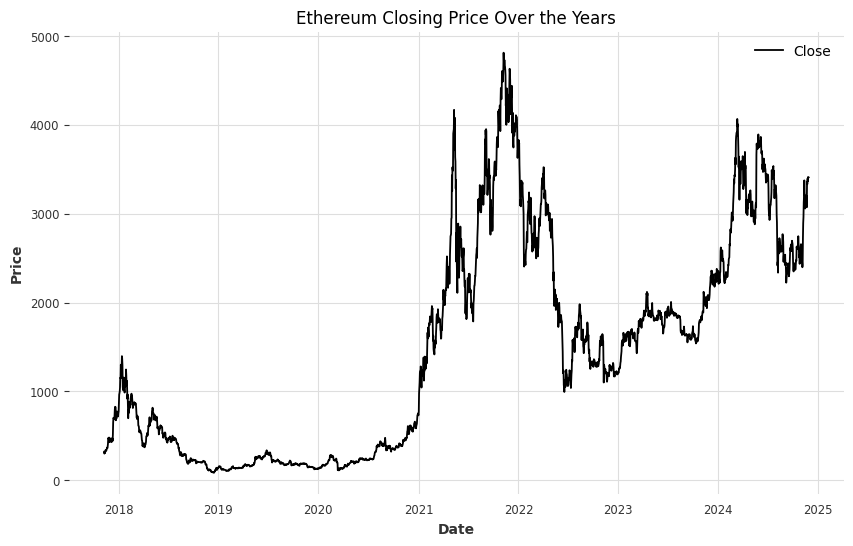

In [34]:
ethereum_data.plot.line(y='Close', figsize=(10,6), use_index=True)
plt.title('Ethereum Closing Price Over the Years')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [35]:
ethereum_data.index = pd.to_datetime(ethereum_data.index) 

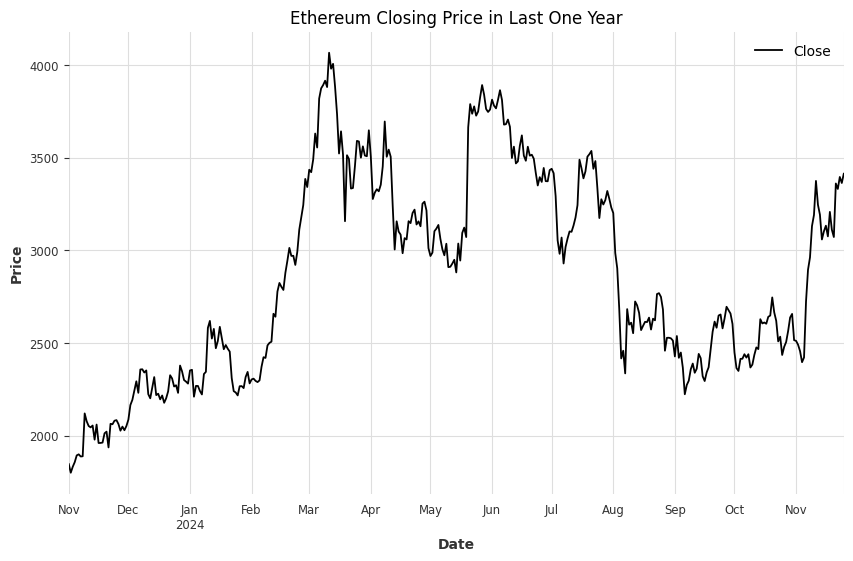

In [36]:
ethereum_one_year = ethereum_data.loc['2023-11-01':'2024-11-26']
ethereum_one_year.plot.line(y='Close', figsize=(10,6), use_index=True)
plt.title('Ethereum Closing Price in Last One Year')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [37]:
wiki = pd.read_csv('D:\Python_Files\Crypto\ethereum_wikipedia_edits.csv', index_col=0, parse_dates=True)
wiki

,edit_count,sentiment,neg_sentiment
2014-02-25,0.066667,-0.066526,0.066667
2014-02-26,0.033333,-0.033243,0.033333
2014-02-27,0.033333,-0.033243,0.033333
2014-02-28,0.033333,-0.033243,0.033333
2014-03-01,0.033333,-0.033243,0.033333
...,...,...,...
2024-11-21,0.033333,-0.033160,0.033333
2024-11-22,0.033333,-0.033160,0.033333
2024-11-23,0.033333,-0.033160,0.033333
2024-11-24,0.033333,-0.033160,0.033333


In [38]:
wiki.columns = [col.title() for col in wiki.columns]
wiki.columns

Index(['Edit_Count', 'Sentiment', 'Neg_Sentiment'], dtype='object')

In [39]:
ethereum_wiki_data = ethereum_data.merge(wiki, left_index=True, right_index=True)
ethereum_wiki_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Edit_Count,Sentiment,Neg_Sentiment
2017-11-09,308.644989,329.451996,307.056000,320.884003,893249984,0.0,0.0,0.900000,-0.144123,0.261111
2017-11-10,320.670990,324.717987,294.541992,299.252991,885985984,0.0,0.0,0.966667,-0.177429,0.294444
2017-11-11,298.585999,319.453003,298.191986,314.681000,842300992,0.0,0.0,0.966667,-0.177429,0.294444
2017-11-12,314.690002,319.153015,298.513000,307.907990,1613479936,0.0,0.0,0.966667,-0.177429,0.294444
2017-11-13,307.024994,328.415009,307.024994,316.716003,1041889984,0.0,0.0,1.100000,-0.209260,0.327778
...,...,...,...,...,...,...,...,...,...,...
2024-11-21,3072.055176,3388.542969,3035.846680,3361.053955,51619069348,0.0,0.0,0.033333,-0.033160,0.033333
2024-11-22,3360.654297,3428.460449,3262.808838,3331.600830,36775716442,0.0,0.0,0.033333,-0.033160,0.033333
2024-11-23,3331.645508,3499.370850,3317.654785,3396.223389,38835184688,0.0,0.0,0.033333,-0.033160,0.033333
2024-11-24,3396.999512,3451.802246,3288.430908,3363.659912,27901454185,0.0,0.0,0.033333,-0.033160,0.033333


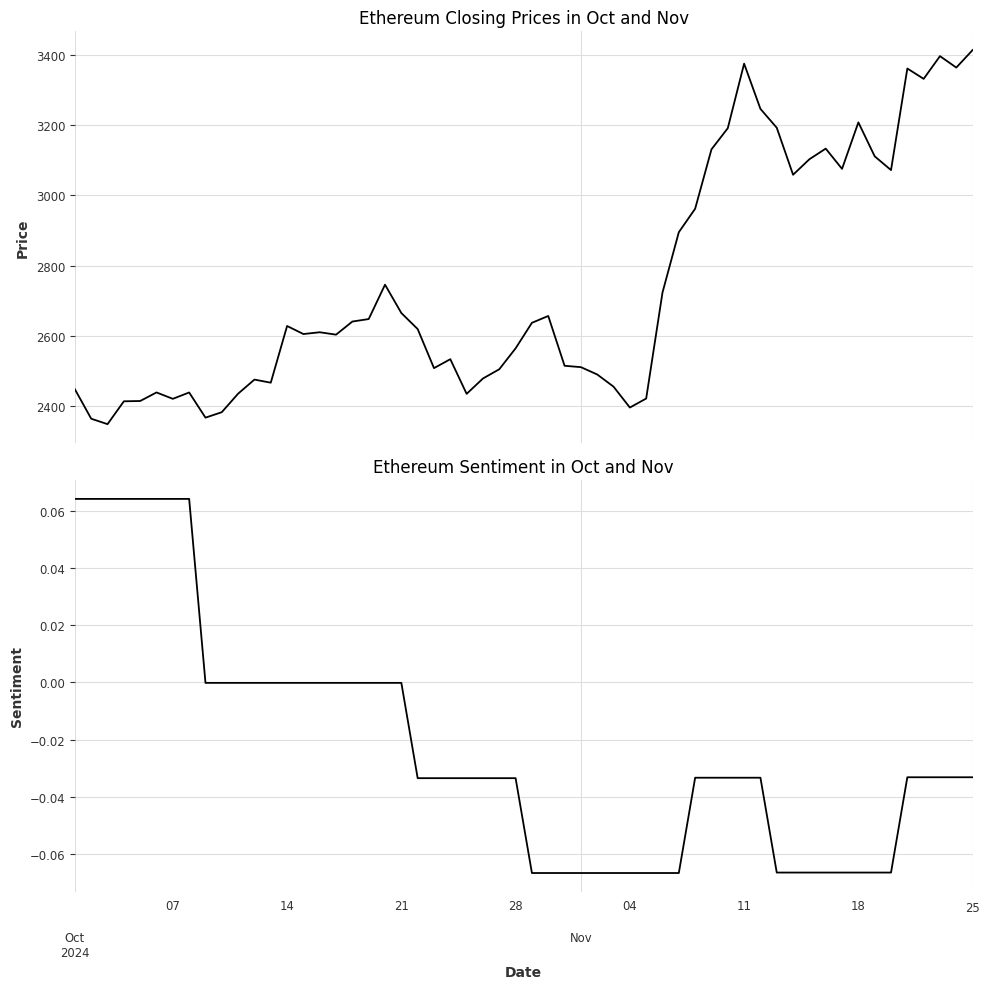

In [40]:
ethereum_subset = ethereum_wiki_data.loc['2024-10-01':'2024-11-26']

# Define the figure and subplots
fig, axes = plt.subplots(2,1, figsize=(10, 10), sharex=True)

# First subplot: Ethereum Closing Prices
ethereum_subset['Close'].plot(
    ax=axes[0],
    title='Ethereum Closing Prices in Oct and Nov',
    ylabel='Price'
)

# Second subplot: Ethereum Sentiment
ethereum_subset['Sentiment'].plot(
    ax=axes[1],
    title='Ethereum Sentiment in Oct and Nov',
    ylabel='Sentiment'
)

# Add a shared x-axis label
axes[1].set_xlabel('Date')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()